<a href="https://colab.research.google.com/github/JoanraGimenez/SSN/blob/main/MC_estimate_of_sphere_volume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HW4 ASSIGMENT (6/3/2025) "Monte Carlo method"**


OPTION 3: Change the program of the Pi calculation using MonteCarlo

Implement one of the following improvements/changes to the Pi simulations: https://github.com/
jfaraudo/MonteCarlo-example

- Instead of calculating Pi, modify the program to calculate the volume of a sphere. Is the
convergence better or worse than in the 2D case of a circle?



Enter number of points for Monte Carlo estimate of Pi?
>10000000

Enter size of jump (example 0.2): 
>0.2

--------------

Performance of calculation
Number of failed jumps (removed): 1426436  ( 14.26436 %)

Result

Number of points inside cube of area 8: 10000000
Number of points inside unit sphere: 5239444
Ratio unit sphere/full cube= 52.394439999999996 %

Estimated Area of unit sphere = 0.5239444 x Total Volume = 4.1915552
 Exact volume value: 4.1887902047863905


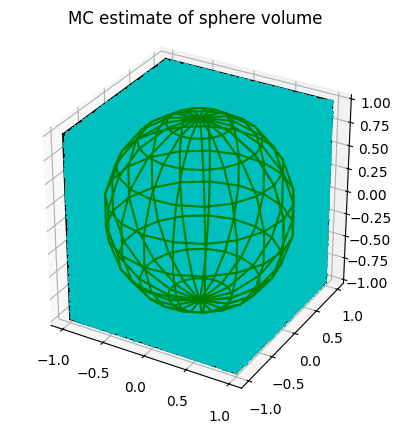

In [15]:
#We import the libraries
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from itertools import product, combinations


#Input total number of random points
total_random_points = int(input("\nEnter number of points for Monte Carlo estimate of Pi?\n>"))

#Input jump size
delta = float(input("\nEnter size of jump (example 0.2): \n>"))

# Init counter of number of points inside unit circle and inside unit square
inside_sphere = 0
inside_cube = 0
outside = 0

#Create list to save x,y,z of points inside sphere to be shown in the graph
xc = []
yc = []
zc = []

#Create list to save x,y,z of points inside cube but outside circle to be shown in the graph
xs = []
ys = []
zs = []

#---------------------------------------------------
#Calculation

#Initial position
x=1.0
y=1.0
z=1.0

while (inside_cube < total_random_points):

    #generate a random jump
    del_x = np.random.uniform(-delta, delta)
    del_y = np.random.uniform(-delta, delta)
    del_z = np.random.uniform(-delta, delta)

    #check new positions and if they are outside the cube make zero jump
    if abs(x+del_x) > 1.0 or abs(y+del_y) > 1.0 or abs(z+del_z)> 1.0:
        outside = outside +1
        del_x = 0.0
        del_y = 0.0
        del_z = 0.0

    #Update number of points inside cube and update the new starting position
    inside_cube = inside_cube +1
    x = x + del_x
    y = y + del_y
    z = z + del_z

     #check whether it is inside sphere (count and save for representation)
    if x**2 + y**2 +z**2<= 1.0:
        inside_sphere = inside_sphere +1
        xc.append(x)
        yc.append(y)
        zc.append(z)
    else:
        xs.append(x)
        ys.append(y)
        zs.append(z)

#---------------------------------------------------

# Statistics

# Number of points inside circle as compared with total
sphere_ratio = inside_sphere /  inside_cube

#Number of points inside sphere as compared with those inside the total cube with area 8.0
pi_approx = 8.0*sphere_ratio

# Print output
print('\n--------------')
print('\nPerformance of calculation')
print('Number of failed jumps (removed):',outside,' (',100*outside/inside_cube,'%)')
print('\nResult')
print('\nNumber of points inside cube of area 8:', inside_cube)
print('Number of points inside unit sphere:',inside_sphere,)
print('Ratio unit sphere/full cube=',sphere_ratio*100,'%')
print('\nEstimated Area of unit sphere =',sphere_ratio,'x Total Volume =', pi_approx)
print(' Exact volume value:', np.pi*(4/3))


#Plot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect("equal")
# Drawing the cube
r = [-1, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s, e), color="k")
# Add a sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="g")

#create plot with the data and title
plt.plot(xc,yc,zc,'bo',markersize=1.0)
plt.plot(xs,ys,zs,'co',markersize=1.0)
plt.title('MC estimate of sphere volume')

#Show plot in screen
plt.show()
